> # **2024-1 기계학습 기말 프로젝트 과제**




> ### **<호텔 리뷰 감성 분류 분석>**


> 정보통계학전공 202010925 이수민


# **1. 프로젝트 개요**

호텔 예약사이트에 있는 리뷰를 분석함으로써, 새로운 리뷰에 대해 사전에 감성을 예측하고자 함

## 1-1. 데이터 소개

<img src="https://drive.google.com/uc?id=1CfcSu-8upx9km2Wt4ITnYeNbTpriUVUw
" width=500>

**"트립어드바이저에서 서울에 있는 호텔" 에 대한 리뷰를 총 3,126개 수집**

사전에 계획한 총 리뷰개수 : 50(호텔 당 리뷰개수) x 40(호텔개수)=2000

-> 수집한 데이터 분석 결과, 긍정/부정 비율이 긍정에 과도하게 치우쳐, 부정으로 라벨링할 리뷰 추가로 수집


> 긍정/부정 기준

> 별점이 4점 이상인 리뷰 - 긍정 / 별점이 3점 이하인 리뷰 - 부정





**데이터 수집 결과**

<img src="https://drive.google.com/uc?id=10KqvoybvH2MUd810z4Peh0qN-8kf11BF" width=700>

# **2. 프로젝트 과정**

## 2-1. 데이터 불러오기 및 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-06-13 05:04:57--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-06-13 05:04:58--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab444fbd6ee9a0dbae62d378aa.dl.dropboxusercontent.com/cd/0/inline/CUt-9gALmyQq2QcamutwZH1t6VsletoK6r6YV9cd3jBKdla-km0UTXh3T27m09q_TwtK2KCVwOUjVcGX4BqKbMAtYQuaIaP0IxM7dzov13GLC7Kb2SVJPH4VjUWJRHOrvBPG3BTdJVi6x0o1gxmjOv_w/file?dl=1# [following]
--2024-06-13 05:04:58--  https://ucab444fbd6ee9a0dbae62d378

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split

from konlpy.tag import Komoran

In [4]:
reviews = pd.read_csv("/content/drive/MyDrive/open/total.csv")

In [5]:
reviews

,Unnamed: 0,hotel,score,review
0,0,아리랑힐 호텔 동대문,5,최근에 회사 연수로 급 서울권 호텔을 검색했어요 코로나 이전보다 가격이 많이 올랐더...
1,1,아리랑힐 호텔 동대문,5,뚜벅이들에게 중요한 교통편이 편해서 좋았습니다. 6번 출구에서 바로 찾을 수 있고 ...
2,2,아리랑힐 호텔 동대문,5,작년 초에 친구들과 가성비 좋은 호텔을 찾아보다가 아리랑힐 호텔을 투숙했는데 다른 ...
3,3,아리랑힐 호텔 동대문,5,잠깐 서울 방문할 일이 있어 이용하였던 호텔인데 프런트 직원분들도 너무 친절하시고 ...
4,4,아리랑힐 호텔 동대문,5,성신여대 역에서 가까워 교통이 정말 편리합니다. 룸 컨디션도 좋아 정말 좋게 푹 쉬...
...,...,...,...,...
3121,242,롯데 호텔 월드,1,룸이 1818호라고 안내하며 웃음을 참는 직원을 제가 어떻게 받아들여야 하나요? 웃...
3122,243,롯데 호텔 월드,1,룸이 방음이 안돼서 옆방 아이 이야기소리에 자다 깼어요 복도랑 방 냄새도 퀘퀘하고 ...
3123,244,롯데 호텔 월드,1,Ⅰ-1. 2017년 11월 26일 본인의 장인어른께서 잠실롯데호텔 사우나 실을 이용...
3124,245,롯데 호텔 월드,1,1. 몇 년 전 방문 했을 때도 우리 가족은 매우 불쾌했다. 담당자는 체크아웃을 하...


In [6]:
reviews = reviews.drop(labels=['Unnamed: 0'], axis=1)
reviews

,hotel,score,review
0,아리랑힐 호텔 동대문,5,최근에 회사 연수로 급 서울권 호텔을 검색했어요 코로나 이전보다 가격이 많이 올랐더...
1,아리랑힐 호텔 동대문,5,뚜벅이들에게 중요한 교통편이 편해서 좋았습니다. 6번 출구에서 바로 찾을 수 있고 ...
2,아리랑힐 호텔 동대문,5,작년 초에 친구들과 가성비 좋은 호텔을 찾아보다가 아리랑힐 호텔을 투숙했는데 다른 ...
3,아리랑힐 호텔 동대문,5,잠깐 서울 방문할 일이 있어 이용하였던 호텔인데 프런트 직원분들도 너무 친절하시고 ...
4,아리랑힐 호텔 동대문,5,성신여대 역에서 가까워 교통이 정말 편리합니다. 룸 컨디션도 좋아 정말 좋게 푹 쉬...
...,...,...,...
3121,롯데 호텔 월드,1,룸이 1818호라고 안내하며 웃음을 참는 직원을 제가 어떻게 받아들여야 하나요? 웃...
3122,롯데 호텔 월드,1,룸이 방음이 안돼서 옆방 아이 이야기소리에 자다 깼어요 복도랑 방 냄새도 퀘퀘하고 ...
3123,롯데 호텔 월드,1,Ⅰ-1. 2017년 11월 26일 본인의 장인어른께서 잠실롯데호텔 사우나 실을 이용...
3124,롯데 호텔 월드,1,1. 몇 년 전 방문 했을 때도 우리 가족은 매우 불쾌했다. 담당자는 체크아웃을 하...


In [7]:
#결측값 확인
reviews.isnull().sum()

hotel     0
score     0
review    0
dtype: int64

In [8]:
reviews['review'][0]

'최근에 회사 연수로 급 서울권 호텔을 검색했어요 코로나 이전보다 가격이 많이 올랐더군요 저는 동대문 인근에 볼 일이 있고 좀 조용한 장소를 찾고 싶어서 검색중에 아리랑힐을 찾았습니다 슈퍼리어 더블을 예약했는데 무료로 디럭스로 업그레이드 진행을 해주더군요  배정된 객실은 씨티뷰 성신여대 골목이 보이는 객실이였어요 젊은 친구들도 보고 거리도 참 좋더군요 객실도 왠만한 비지니스 호텔보다 깨끗하고 욕실에는 세면도구까지 완벽히 구비되어 있어요 여러가지로 좋았던 동대문 아리랑 힐 호텔 다음에도 재방문 의사 있습니다'

In [9]:
#1(긍정)과 0(부정) 라벨링
def reviews_label(score):
  if score > 3:
    return 1
  else:
    return 0
reviews['label'] = reviews['score'].apply(lambda x: reviews_label(x))

In [10]:
reviews

,hotel,score,review,label
0,아리랑힐 호텔 동대문,5,최근에 회사 연수로 급 서울권 호텔을 검색했어요 코로나 이전보다 가격이 많이 올랐더...,1
1,아리랑힐 호텔 동대문,5,뚜벅이들에게 중요한 교통편이 편해서 좋았습니다. 6번 출구에서 바로 찾을 수 있고 ...,1
2,아리랑힐 호텔 동대문,5,작년 초에 친구들과 가성비 좋은 호텔을 찾아보다가 아리랑힐 호텔을 투숙했는데 다른 ...,1
3,아리랑힐 호텔 동대문,5,잠깐 서울 방문할 일이 있어 이용하였던 호텔인데 프런트 직원분들도 너무 친절하시고 ...,1
4,아리랑힐 호텔 동대문,5,성신여대 역에서 가까워 교통이 정말 편리합니다. 룸 컨디션도 좋아 정말 좋게 푹 쉬...,1
...,...,...,...,...
3121,롯데 호텔 월드,1,룸이 1818호라고 안내하며 웃음을 참는 직원을 제가 어떻게 받아들여야 하나요? 웃...,0
3122,롯데 호텔 월드,1,룸이 방음이 안돼서 옆방 아이 이야기소리에 자다 깼어요 복도랑 방 냄새도 퀘퀘하고 ...,0
3123,롯데 호텔 월드,1,Ⅰ-1. 2017년 11월 26일 본인의 장인어른께서 잠실롯데호텔 사우나 실을 이용...,0
3124,롯데 호텔 월드,1,1. 몇 년 전 방문 했을 때도 우리 가족은 매우 불쾌했다. 담당자는 체크아웃을 하...,0


In [11]:
train_data, test_data = train_test_split(reviews, test_size=0.25, random_state=123)

훈련데이터 : 검증데이터 = 0.75 : 0.25 비율로 데이터 분리

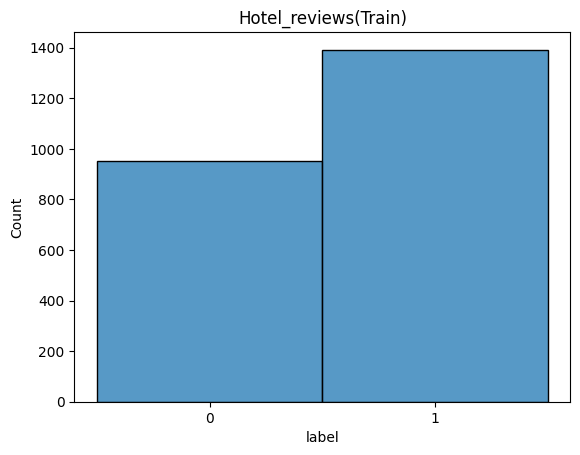

In [12]:
#클래스 불균형 확인
ax = sns.histplot(train_data["label"], discrete=True)
ax.set(title="Hotel_reviews(Train)")

# x축 라벨을 설정합니다.
ax.set_xticks([0, 1])

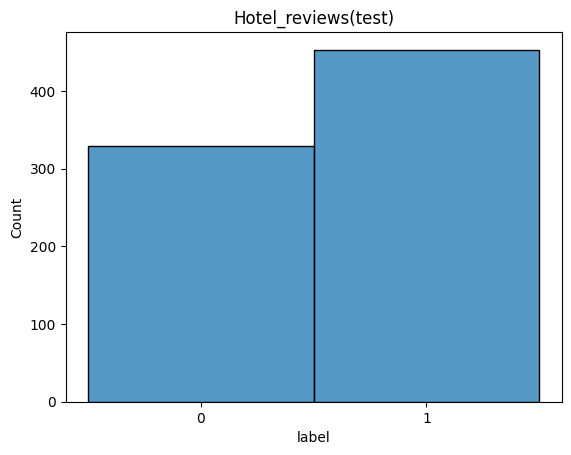

In [13]:
#클래스 불균형 확인
ax = sns.histplot(test_data["label"], discrete=True)
ax.set(title="Hotel_reviews(test)")

# x축 라벨을 설정합니다.
ax.set_xticks([0, 1])

In [14]:
#인덱스 정리
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rc
import urllib.request

In [16]:
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x781eb494aa70>)

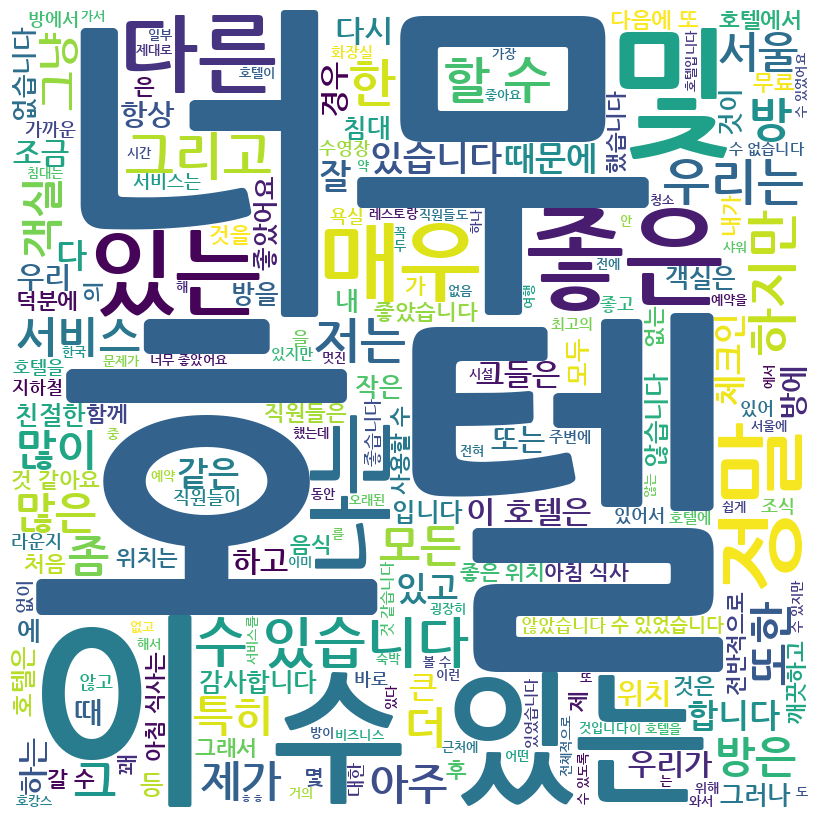

In [17]:
# Stopwords 워드클라우드로 체크

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. 문장 데이터를 단어화하기
for val in train_data["review"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800,
                font_path='AppleGothic.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [18]:
tokenized_text[0]

["['여의도에",
 '일있어서',
 '왔다가',
 '숙박했는데',
 '쾌적하고',
 '침대',
 '엄청',
 '푹신',
 '푹신해서',
 '좋아요😆!!',
 '역이랑도',
 '가까워서',
 '차막히는',
 '시간에는',
 '주차하고',
 '근처는',
 '돌아다니기',
 '편해요.',
 '그리고',
 '방도',
 '넓고',
 '하루',
 '편하게',
 '지냈어요😆',
 '체크인',
 '도와주신',
 '리즈님',
 '친절하시고',
 '일찍',
 '도착해서',
 '체크인',
 '시간',
 '안됐는데',
 '일찍',
 '체크인',
 '도와주셔서',
 '편하게',
 '쉬다',
 '가요!',
 '다음에도',
 '여의도',
 '오면',
 '또',
 '숙박할',
 "예정이에요!']"]

In [19]:
train_data['review'][0]

"['여의도에 일있어서 왔다가 숙박했는데 쾌적하고 침대 엄청 푹신 푹신해서 좋아요😆!!  역이랑도 가까워서 차막히는 시간에는 주차하고 근처는 돌아다니기 편해요. 그리고 방도 넓고 하루 편하게 지냈어요😆  체크인 도와주신 리즈님 친절하시고 일찍 도착해서 체크인 시간 안됐는데 일찍 체크인 도와주셔서 편하게 쉬다 가요! 다음에도 여의도 오면 또 숙박할 예정이에요!']"

In [20]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

- 한국어 토크나이저 중 정규화되는 okt 사용
- 트립어드바이저 호텔 리뷰 특성 상 번역되는 어색한 리뷰들과 오타를 okt가 정규화 시킴

- 정규화 -> 한글과 공백을 제외한 문자 모두 제거
- Okt 객체 활용 -> 형태소 단어로 분리
- 불용어 제거
RANKS NL에 제공해주는 한국어 불용어 사전 활용
수집한 호텔리뷰 데이터셋에 특화된 불용어 추가로 제거

In [21]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [22]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
seoul_hotel_stopwords = ['서울','서울시','호텔','숙소','리뷰','직원','방문','조식','프론트','여행','재료','사진',
                         '예약','친구','엄마','어머니','출장',
                         '날씨','코로나','오후','한국','여자친구','남자친구',
                         '위치','객실','욕실','저녁','남성','여성','대략',
                         '남편','아내','침실','패키지','정말', '전반적으로', '체크인', '샤워',
                         '직원', '레스토랑','아침식사']
for word in seoul_hotel_stopwords:
  stopwords.append(word)

okt = Okt()

- 토큰화 : 문자 인덱스 벡터로 전환
- 학습데이터 리뷰로 단어 사전 생성 후 리뷰데이터를 인덱스로 전환

In [23]:
clean_train_review = []

for review in train_data['review']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stopwords))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['여의도',
  '에',
  '이다',
  '오다',
  '숙박',
  '하다',
  '쾌적하다',
  '침대',
  '엄청',
  '푹신',
  '푹신하다',
  '좋다',
  '역',
  '이랑',
  '도',
  '가깝다',
  '차',
  '막히다',
  '시간',
  '에는',
  '주차',
  '하고',
  '근처',
  '는',
  '돌아다니다',
  '편하다',
  '그리고',
  '방도',
  '넓다',
  '하루',
  '편하다',
  '지내다',
  '체크',
  '인',
  '도와주다',
  '리즈',
  '님',
  '친절하다',
  '일찍',
  '도착',
  '하다',
  '체크',
  '인',
  '시간',
  '안',
  '돼다',
  '일찍',
  '체크',
  '인',
  '도와주다',
  '편하다',
  '쉬',
  '다',
  '가요',
  '다음',
  '에도',
  '여의도',
  '오다',
  '또',
  '숙박',
  '하다',
  '예정',
  '이에요'],
 ['은',
  '작',
  '지만',
  '아주',
  '깨끗하다',
  '현대',
  '적',
  '인',
  '유럽',
  '식',
  '아침',
  '식사',
  '를',
  '제공',
  '명동',
  '중심',
  '에',
  '층',
  '건물',
  '의',
  '일레븐',
  '시티뱅크',
  '가',
  '근처',
  '에',
  '있다',
  '세',
  '매우',
  '편리하다',
  '및',
  '더',
  '많다',
  '저',
  '는',
  '혼자',
  '나',
  '커플',
  '이',
  '이',
  '을',
  '추천',
  '가족',
  '은',
  '조금',
  '타이',
  '트'],
 ['이',
  '에서',
  '박',
  '일',
  '을',
  '지내다',
  '제',
  '가',
  '도착',
  '하다',
  '때',
  '전',
  '흡연실',
  '로',
  '안내',
  '를',
  '받다',
  '

In [24]:
clean_test_review = []
for review in test_data['review']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt,
                                           remove_stopwords=True,
                                           stop_words=stopwords))
  else:
    clean_test_review.append([])

In [25]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

In [26]:
DEFAULT_PATH  = '/content/drive/MyDrive/open' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [27]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/content/drive/MyDrive/openCLEAN_DATA/'
DATA_OUT = '/content/drive/MyDrive/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r',encoding = 'utf-8'))

In [28]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],
       'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5,
       'hidden_dimension':250,'output_dimension':1}


## 2-2. 모델 생성 및 학습 결과



> **CNN 모델**
임베딩 층 / 합성곱 층 / 풀링 층 / 드롭아웃 층 / 완전연결 층



In [29]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))


  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [30]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,'/content/drive/MyDrive/openCLEAN_DATA/')

/content/drive/MyDrive/DATA_OUT -- Folder already exists 

Epoch 1/10
4/5 [=======================>......] - ETA: 0s - loss: 0.6839 - accuracy: 0.5435
Epoch 1: val_accuracy improved from -inf to 0.61277, saving model to /content/drive/MyDrive/DATA_OUT/cnn_classifier_kr\weights.h5
5/5 [==============================] - 6s 391ms/step - loss: 0.6818 - accuracy: 0.5486 - val_loss: 0.6577 - val_accuracy: 0.6128
Epoch 2/10
4/5 [=======================>......] - ETA: 0s - loss: 0.6680 - accuracy: 0.5933
Epoch 2: val_accuracy did not improve from 0.61277
5/5 [==============================] - 1s 104ms/step - loss: 0.6686 - accuracy: 0.5917 - val_loss: 0.6415 - val_accuracy: 0.6128
Epoch 3/10
4/5 [=======================>......] - ETA: 0s - loss: 0.6384 - accuracy: 0.5903
Epoch 3: val_accuracy improved from 0.61277 to 0.61702, saving model to /content/drive/MyDrive/DATA_OUT/cnn_classifier_kr\weights.h5
5/5 [==============================] - 1s 99ms/step - loss: 0.6371 - accuracy: 0.5917 - val_l

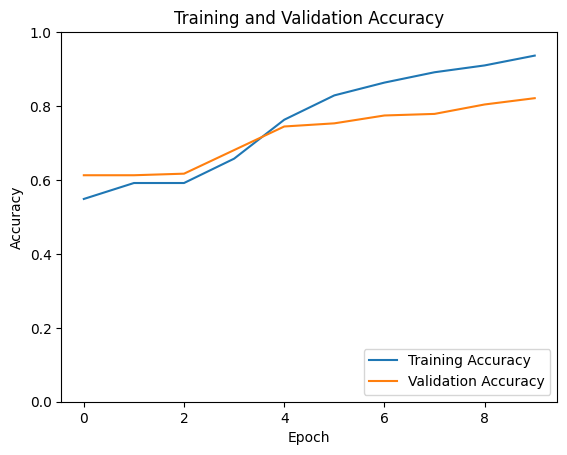

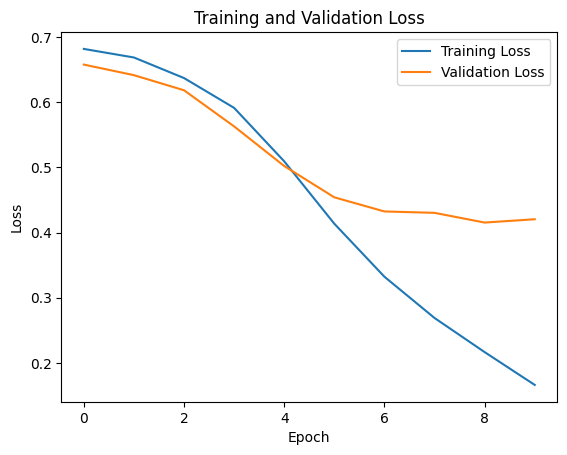

In [31]:
import matplotlib.pyplot as plt

# 학습 정확도 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# 학습 손실 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [32]:
#테스트데이터 얼마나 잘 맞추는지 검증
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('/content/drive/MyDrive/DATA_OUT/cnn_classifier_kr\weights.h5')
model.evaluate(test_input, test_label_data)

25/25 [==============================] - 0s 6ms/step - loss: 0.4475 - accuracy: 0.8146


[0.4474751055240631, 0.8145779967308044]

In [33]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/drive/MyDrive/openCLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = stopwords # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('/content/drive/MyDrive/DATA_OUT/cnn_classifier_kr\weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

감성분석할 문장을 입력해 주세요.: 다시는 안 오겠습니다
1/1 [==============================] - 0s 248ms/step
88.68% 확률로 부정 리뷰입니다.



# **3. 결론 및 개선점**

#### 3-1. 결론

학습 데이터 성능:

- Train Loss: 0.1663
- Train Accuracy: 0.9365
- 모델은 학습 데이터에서 높은 정확도를 보이고 있음



---



검증 데이터 성능:
- Val Loss: 0.4205
- Val Accuracy: 0.8213



---

테스트 데이터 성능 :
- Val Loss: 0.4475
- Val Accuracy: 0.8146


#### 3-2. 개선점

기계학습 수업 시간에 배웠던 것처럼 텍스트 데이터는 본질적으로 순차적인(sequence) 특성을 가지며, 앞뒤 단어의 순서와 문맥이 매우 중요하다. 텍스트 데이터 분석하는데 적합하며 장기 의존성을 처리할 수 있는 LSTM 모델을 적용해보고 싶다.